<div style="margin-bottom:110px">
    <a href="https://www.ismt.edu.np/">
        <img src="https://raw.githubusercontent.com/itSubeDibesh/StockPricePredection/master/docs/ismt.png?token=GHSAT0AAAAAABMOFEGCL3V5EFSAZQC2JHUQYSNIDPA" alt="ismt College"  height="100" align="left">
    </a>
    <a href="https://www.sunderland.ac.uk/">
        <img src="https://raw.githubusercontent.com/itSubeDibesh/StockPricePredection/master/docs/sunderland.png?token=GHSAT0AAAAAABMOFEGCOHPIXJFDP3OYFVTKYSNIE2A" alt="University of Sunderland" align="right" height="100" >
    </a>
    <div align="center"><h3><b>Stock Price Prediction Using Machine Learning Algorithms</b></h3><p><b><a href="https://github.com/itSubeDibesh">Dibesh Raj Subedi</a></b></p></div>
</div>

# **Stock Price Prediction Using Machine Learning Algorithms**

- **Student Name:** [Dibesh Raj Subedi](https://github.com/itSubeDibesh)
- **Student ID:** 219327253
- **Module Name:** Artificial Intelligence
- **Module Code:** CET313
- **Module Leader / Module Tutor:** [Mr. Himalayan Kashyapati](https://www.youtube.com/channel/UCxOGD9bX_533jPWXfz8smlQ)
- **Center:** [ISMT College](https://www.ismt.edu.in/)
- **Programme:** BSC. (Hons) Computer Systems Engineering
- **Project:** Stock Price Prediction Using Machine Learning Algorithms

[![wakatime](https://wakatime.com/badge/github/itSubeDibesh/StockPricePredection.svg)](https://wakatime.com/badge/github/itSubeDibesh/StockPricePredection)


## **_Table of Contents_**

- Introduction
- Package Setups and Imports
  - Dependencies Installation
  - Import Libraries
- Data Extraction
  - Data Extraction Function
    - From NEPSE
    - From SmartWealthPro
    - From NepaliPaisa
  - Data Mining
    - Data Extraction from Nepse, SmartWealthPro and NepaliPaisa
- Stock Price Prediction of Nabil Bank
  - Pre-Processing
    - Step 1: Data Preprocessing
    - Step 2: Data Pre-Visualization
    - Step 3: Exploratory Data Analysis
  - Accuracy Matrix Evaluator
  - Model Building
    - Splitting Dataset into Training and Testing
    - Linear Regression
      - Accuracy Matrix
      - Plotting Output
    - Random Forest Regression
      - Accuracy Matrix
      - Plotting Output
    - Model Evaluation


## Introduction

Being a passive investor myself, the objective of this project is to **predict** the stock price of a company using **Machine Learning** techniques.


**Problem Statement:**

Predict Closing price of Company based on previous datasets.

## Package Setups and Imports

Installing Dependencies and Importing Libraries Web Scraping 🕸, Data Processing📈 and Data Visualization📊.


### Dependencies Installation 📦🛠


In [1]:
# Data Extraction
%pip install beautifulsoup4
%pip install requests
%pip install urllib3
%pip install html5lib
# Data Manipulation
%pip install numpy
%pip install pandas
# Data Visualization
%pip install matplotlib
# Data Analysis
%pip install seaborn
# Machine Learning
%pip install sklearn


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Import Libraries ⬇📦


In [2]:
from bs4 import BeautifulSoup as BS
import requests
import urllib3
import json
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn import model_selection
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline


## Data Extraction

To implement ML modules we need dataset and I will be using **Nepal Stock Exchange**([NEPSE](http://www.nepalstock.com)) and [SmartWealthPro](https://app.smartwealthpro.com) website to scrape dataset.

Useful request types to make web and api requests for data extraction


In [3]:
# Request List
REQUESTS = ["GET", "POST"]

# Request type dictionary
REQUEST_TYPE = {
    "GET": REQUESTS[0],
    "POST": REQUESTS[1]
}


### Data Extraction Functions 📃🕸

To extract/mine data I have defined functions to scrape and invoke intercepted api request's from [NEPSE](http://www.nepalstock.com) and [SmartWealthPro](https://app.smartwealthpro.com).


#### From [NEPSE](http://www.nepalstock.com)

After reading [Quassarian Viper](https://q-viper.github.io/2020/11/21/deploying-nepse-data-visualizer-on-heroku/)'s post I found an data extraction method from [Nepse](http://www.nepalstock.com) website and created functions respectively.


In [4]:

def nepse_company_names(save_to_csv: bool = False) -> pd.DataFrame:
    """Extracts all the company names from NEPSE website

    Args:
        save_to_csv: Save the data to csv file - Ex: True

    Return:
        DataFrame of the company names

    """
    http = urllib3.PoolManager()
    http.headers.update({'User-Agent': 'Mozilla/5.0'})
    web_page = http.request(
        method=REQUEST_TYPE["GET"],
        url="http://www.nepalstock.com/company?_limit=500"
    )
    soup = BS(web_page.data, 'html5lib')
    table = soup.find('table')
    company = []
    rows = [row.findAll('td') for row in table.findAll('tr')[1:-2]]
    col = 0
    notfirstrun = False
    for row in rows:
        companydata = []
        for data in row:
            if col == 5 and notfirstrun:
                companydata.append(data.a.get('href').split('/')[-1])
            else:
                companydata.append(data.text.strip())
            col += 1
        company.append(companydata)
        col = 0
        notfirstrun = True
    status = web_page.status
    print(
        f"Status Code: {status}, NEPSE Mining Company List ⛏ Status: {'Success' if status==200 else 'Failed'}")
    df = pd.DataFrame(company[1:], columns=company[0])
    df.rename(columns={'Operations': 'Symbol No'}, inplace=True)
    df.drop(columns='', inplace=True)
    df.drop(columns='S.N.', inplace=True)

    if(save_to_csv):
        path = './NepseDataset'
        if not os.path.exists(path):
            os.makedirs(path)
        df.to_csv(path+'/company_list.csv', index=False)

    return df


#### From [SmartWealthPro](https://app.smartwealthpro.com/)

Although [Data Extraction From Nepse Website](#data-extraction-from-nepalipaisa-website-📃) didn't helped [only for cross validating SmartWealthPro NepseId with Nepse symbol No] much, I found a way to extract data from **paid application**. Firstly, I registered for **Free Trial** on [SmartWealthPro](https://app.smartwealthpro.com) and used [Postman](https://www.postman.com/)'s **Interceptor** to intercept request and response from browser using [Postman](https://www.postman.com/)'s [Interceptor Plugin](https://chrome.google.com/webstore/detail/postman-interceptor/aicmkgpgakddgnaphhhpliifpcfhicfo) and extracted useful URL's along with cookies and imported the request code from postman to python and created respective function which would also store dataset on local drive as csv file.

ℹ️ **NOTE:** If a failure or **_401_** status is shown it means the cookie has expired and you need to re-login and extract cookie again from [SmartWealthPro](https://app.smartwealthpro.com).


In [5]:
# Intercepted Cookie of SmartWealthPro from browser -> This might return 401 when cookie is expired
COOKIE = ".AspNetCore.Antiforgery.c2MYB_mZqSE=CfDJ8EWKBLSA7b5Gk-CEUVa2792OiFFJolx5Jph5CHjstj4lidPItWS3O22MpzpvCDXxJOUggsUlcrAt-QMc2RuO9-qT1sroZqDVy7Y2vPac_Tkn2G5g3QGrYc7-qoNJ5sQj9_1zlXFylUjHm0g1DDly6Ic; .AspNetCore.Identity.Application=CfDJ8EWKBLSA7b5Gk-CEUVa2791O-YsQ7CeimFTk6u2Jf7z04KJ53Fb_uhejtMHNlqzAm3ox4QVhOiDwyOyPSCOR76KgWOquTaEiZMRaYZ8McbdEAe8kqNIuEz2qo2s5iosl77_dfgBAdOZbHilggn2h0pYqyfYtAIVDnFtG5mS8LeSaKvW-c4aEQqJfajNCu7JGgoFxvDkoMYKyRiPBK5X7lCZUXBA38Ub7_ApM6q6ggl6aFSaE5AZKeNVbI0TozJBFJqQMX2_OWSFsQ6QZ0_WlcbhMDNnnqewkThgrRzpIHF87Hu4LjjT8L_6L5B4W6npjEaHFS4RIxLAyIptOC2Z7co_7-Pwa95c4r_bsyP7ZGqAyD7HIm6hdWYIGyc2nrQfSs0KKf5jv1RmHfzy2fNZ9JAnCo43CrDvkIlPwaPFNmaV7reikmtEUeKLhpwy_p0_01tHW2QqcFfZX0QKhQbxFon5OfKNDFyDNLzfbQvyhWXpGUwzN8Y8yksKJHyFjSRIRxS6Kt7M9lnXtZhNQxS5TGKLBMdzR8q308416rlosUIJ8Mvcq0Qi5tGyZOkgNxbw-NErTbbLBP9Np2J63j3sHplq-pSWzxvRM3dVatgYLz7BpzQVB9MLvHAl_bv-z4uT-MM2ikpGqrH2pNGyEMHHjOmbaqITeEsn--jSi2dsLPsJlAixXLKOG4uclOKCoaHD7trtUaKlLM_SkD9KZ0CyMJDPjfL41ULVz4peaNM1Xc_vlR1HYF-G_MXNoYpsEC8Gqz21tzh0_zoq-4uSfqzLz0OFe16ZuO8wGB91_MOM8omoyMo6JLZH6G1b27NH9sx1IsMpgd8XWDgPpL1VWtWBArqw; .AspNetCore.Session=CfDJ8EWKBLSA7b5Gk%2BCEUVa2791LnNx9PbIa7qXqmpYayXZq4cKKkOyCZ7Oc3yzTU0miiI2WLB7RPIeZ6glTaXzQEu%2FWF2nC0E2mFYmyeRwkYBmeOdWs%2B6BR2TO5uwK9V8MN6bkp8L9e0y98j8LvPwRMfMxs6VitBY%2FCBxEmeuHC5S6Y"

# Request headers payload
headers = {
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="99", "Microsoft Edge";v="99"',
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Content-Type': 'application/json; charset=utf-8',
    'X-Requested-With': 'XMLHttpRequest',
    'sec-ch-ua-mobile': '?0',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36 Edg/99.0.1150.55',
    'sec-ch-ua-platform': '"Windows"',
    'Cookie': COOKIE
}


def smart_wealth_company_list(save_to_csv=False) -> pd.DataFrame:
    """ Retrives List of Company from SmartWealthPro which includes CompanyId Defined by SmartWealthPro and also help's to export as csv file.

    Args:
        save_to_csv: (bool) - Ex : True
    Returns:
        df: (pd.DataFrame)
    """
    url = "https://app.smartwealthpro.com/api/GetAutoCompleteCompanies?_=1648523415665"
    payload = {}
    response = requests.request("GET", url, headers=headers, data=payload)
    print(
        f"Status Code: {response.status_code}, SmartWealthPro Mining Company List ⛏ Status: {'Success' if response.status_code==200 else 'Failed'}")
    if response.status_code == 200:
        SMARTWEALTH_JSON = json.loads(response.text)
        df = pd.DataFrame(SMARTWEALTH_JSON["result"])
        df.drop(columns='type', inplace=True)
        df.rename(columns={'companyId': 'CompanyId', 'nepseCompanyId': 'NepseId',
                           'companyName': 'Company', 'stockSymbol': 'Symbol', 'sector': 'Sector'}, inplace=True)
        if save_to_csv:
            path = "./SmartWealthDataset"
            if not os.path.exists(path):
                os.makedirs(path)
            df.to_csv(path + '/smartwealthpro_company_list.csv', index=False)
        return df
    else:
        print(
            f"Status Code: {response.status_code}, SmartWealthPro Mining Company List ⛏ Status: {'Success' if response.status_code==200 else 'Failed'}")
        return None


def smart_wealth_company_history(companyId: str, startDate: str = "", endDate: str = "", save_to_csv=False) -> pd.DataFrame:
    """ Fetch Company History from SmartWealthPro.

    Args:
        companyId: (str) - Ex : 154

        startDate: (str) - Ex : "2010-01-01" (YYYY-MM-DD)

        endDate: (str) - Ex : "2020-01-01"  (YYYY-MM-DD)

        save_to_csv: (bool) - Ex : True

    Returns:
        df: (pd.DataFrame)
    """
    url = "https://app.smartwealthpro.com/api/GetDailyHistoricalData?type=stock&id="+companyId+"&fromDate=" + \
        startDate+"&toDate="+endDate + \
        "&pageNo=1&itemsPerPage=9000000&pagePerDisplay=5&_=1648522274261"
    payload = {}
    response = requests.request("GET", url, headers=headers, data=payload)
    print(
        f"Status Code: {response.status_code}, SmartWealthPro Mining Company ID: {companyId} ⛏ Status: {'Success' if response.status_code==200 else 'Failed'}")
    if response.status_code == 200:
        SMARTWEALTH_JSON = json.loads(response.text)
        df = pd.DataFrame(SMARTWEALTH_JSON["result"]['data'])
        df.drop(columns='sNo', inplace=True)
        df.rename(columns={'tradeDate': 'Date', 'open': 'Open',
                  'high': 'High', 'low': 'Low', 'close': 'Close'}, inplace=True)
        df.insert(
            0, 'Symbol', SMARTWEALTH_JSON["result"]['summary']['stockSymbol'])
        if save_to_csv:
            path = "./SmartWealthDataset/Company"
            if not os.path.exists(path):
                os.makedirs(path)
            df.to_csv(path+'/smartwealthpro_' +
                      SMARTWEALTH_JSON["result"]['summary']['stockSymbol']+'_history.csv', index=False)
        return df
    else:
        print(
            f"Status Code: {response.status_code}, SmartWealthPro Mining Company ID: {companyId} ⛏ Status: {'Success' if response.status_code==200 else 'Failed'}")
        return None


def smart_wealth_company_code(symbol: str) -> str:
    """
    Returns CompanyCode as per SmartWealthPro using stock symbol.

    Args:
        symbol: (str) - Ex : "AHPC"
    Returns:
        companyCode: (str) - Ex : "154"
    """
    cvs_file = pd.read_csv(
        './SmartWealthDataset/smartwealthpro_company_list.csv')
    return cvs_file[cvs_file['Symbol'] == symbol]['CompanyId'].values[0].__str__()


#### From [NepaliPaisa](https://nepalipaisa.com)

Data Extracted From SmartWealthPro only includes Open High Low Close(OHLC) and Data so, to make a rich dataset, information extracted from Nepali Paisa will will be added to SmartWealthPro data based on Date which will be stored as csv file for further analysis.


In [6]:
def nepali_paisa_history(symbol: str, starting_date: str = "", ending_date: str = "", save_to_csv=False):
    """ Fetch Company History from NepaliPaisa.

    Args:
        symbol: (str) - Ex : AHPC

        startDate: (str) - Ex : "2010-01-01" (YYYY-MM-DD)

        endDate: (str) - Ex : "2020-01-01"  (YYYY-MM-DD)

        save_to_csv: (bool) - Ex : True

    Returns:
        df: (pd.DataFrame)
    """
    url = "https://nepalipaisa.com/Modules/GraphModule/webservices/MarketWatchService.asmx/GetTodaySharePrices"
    payload = "{\"fromdate\":\""+starting_date+"\",\"toDate\":\""+ending_date + \
        "\",\"stockSymbol\":\""+symbol+"\",\"offset\":1,\"limit\":90000}"
    headers = {
        'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="99", "Microsoft Edge";v="99"',
        'Accept': 'application/json, text/javascript, */*; q=0.01',
        'Content-Type': 'application/json; charset=UTF-8',
        'X-Requested-With': 'XMLHttpRequest',
        'sec-ch-ua-mobile': '?0',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36 Edg/99.0.1150.52',
        'sec-ch-ua-platform': '"Windows"'
    }
    response = requests.request("POST", url, headers=headers, data=payload)
    print(f"Status Code: {response.status_code}, NepaliPaisa Mining Company ID: {symbol} ⛏ Status: {'Success' if response.status_code==200 else 'Failed'}")
    if response.status_code == 200:
        NEPALI_PAISA_JSON = json.loads(response.text)
        df = pd.DataFrame(NEPALI_PAISA_JSON["d"])
        df.drop(columns='__type', inplace=True)
        df.drop(columns='AsOfDate', inplace=True)
        df.drop(columns='AsOfDateString', inplace=True)
        df.rename(columns={'AsOfDateShortString': 'Date', 'MaxPrice': 'High',
                  'MinPrice': 'Low', 'ClosingPrice': 'Close', 'StockSymbol': 'Symbol'}, inplace=True)
        if save_to_csv:
            path = "./NepaliPaisa/Company"
            if not os.path.exists(path):
                os.makedirs(path)
            df.to_csv(path+'/nepalipaisa_' + symbol +
                      '_history.csv', index=False)
        return df
    else:
        return None


### Data Extraction ⛏

After defining function to extract data from **NEPSE** and **SmartWealthPro** websites, I invoked functions and extracted dataset and also stored it on csv file locally for data storage and easy manipulation.

ℹ️ **NOTE:** Make yore your internet is connected while mining data.


#### Data Extraction from [Nepse](http://www.nepalstock.com), [SmartWealthPro](https://app.smartwealthpro.com) and [NepaliPaisa](https://nepalipaisa.com).

Data Extraction from **NEPSE** and **SmartWealthPro**, **NepaliPaisa** along with cross validation of **NEPSE** data with **SmartWealthPro** data and data merge with **NepaliPaisa** data based on Symbol and Date.


In [7]:
# Selecting Company - Company Selection from NEPSE_COMPANY_LIST using Company Symbol
# NABIL is one of the top Banks of Nepal, so we will use it as an example
selected_company_symbol = ["NABIL"]
starting_date = "2000-01-01"
ending_date = "2022-12-31"


# Mining Nepse Company List
NEPSE_COMPANY_LIST = nepse_company_names(save_to_csv=True)


# Mining SmartWealthPro for Company List
SMART_WEALTH_COMPANY_LIST = smart_wealth_company_list(save_to_csv=True)

# Extracting Company Code of Selected Companies
selected_company_code = [smart_wealth_company_code(
    symbol) for symbol in selected_company_symbol]

# Cross Validation of Company SymbolNo of NEPSE_COMPANY_LIST and SMART_WEALTH_COMPANY_LIST
for symbol, code in zip(selected_company_symbol, selected_company_code):
    if symbol not in NEPSE_COMPANY_LIST['Stock Symbol'].values and code not in SMART_WEALTH_COMPANY_LIST['NepseId'].values:
        print(
            f"{symbol} with {code} is not in SMART_WEALTH_COMPANY_LIST but exists in NEPSE_COMPANY_LIST")
    else:
        print(
            f"{symbol} with {code} is in SMART_WEALTH_COMPANY_LIST and exists in NEPSE_COMPANY_LIST")
        # Mining Company History From SmartWealthPro
        smart_wealth_company_history(companyId=smart_wealth_company_code(
            symbol), startDate=starting_date, endDate=ending_date, save_to_csv=True)
        nepali_paisa_history(symbol=symbol, starting_date=starting_date,
                             ending_date=ending_date, save_to_csv=True)


Status Code: 200, NEPSE Mining Company List ⛏ Status: Success
Status Code: 200, SmartWealthPro Mining Company List ⛏ Status: Success
NABIL with 27 is in SMART_WEALTH_COMPANY_LIST and exists in NEPSE_COMPANY_LIST
Status Code: 200, SmartWealthPro Mining Company ID: 27 ⛏ Status: Success
Status Code: 200, NepaliPaisa Mining Company ID: NABIL ⛏ Status: Success


In [8]:
# Data Merging and Actual Data Set Creation

# Defining Paths
Nepali_Paisa_Path = "./NepaliPaisa/Company/"
Smart_Wealth_Path = "./SmartWealthDataset/Company/"

# Extracting Files From Paths
Nepali_Paisa_Files = [Nepali_Paisa_Path +
                      file for file in os.listdir(Nepali_Paisa_Path) if file.endswith(".csv")]
Smart_Wealth_Path = [Smart_Wealth_Path +
                     file for file in os.listdir(Smart_Wealth_Path) if file.endswith(".csv")]

if(len(Nepali_Paisa_Files) != len(Smart_Wealth_Path)):
    print("Files are not equal")
else:
    print("Merging Protocol Initiated")
    Data_Set_Path = "./Finaldataset"
    # Create Dir If Not Exists
    if not os.path.exists(Data_Set_Path):
        print("Creating Directory " + Data_Set_Path)
        os.makedirs(Data_Set_Path)
    for nepaliPaisa, smartWealthPro in zip(Nepali_Paisa_Files, Smart_Wealth_Path):
        print(f"Merging {nepaliPaisa} and {smartWealthPro}")
        # Merge Names
        merge_name = nepaliPaisa.split(
            "/")[-1].split(".")[0].replace("nepalipaisa_", "")
        # Merge Output
        merge = pd.merge(pd.read_csv(nepaliPaisa), pd.read_csv(smartWealthPro), on=[
                         "Date", "High", "Low", "Close", "Symbol"], how="inner")
        merge.to_csv(Data_Set_Path+"/"+merge_name+".csv", index=False)
        print(f"Merged {nepaliPaisa} and {smartWealthPro}")
    print("Merging Protocol Completed")


Merging Protocol Initiated
Merging ./NepaliPaisa/Company/nepalipaisa_NABIL_history.csv and ./SmartWealthDataset/Company/smartwealthpro_NABIL_history.csv
Merged ./NepaliPaisa/Company/nepalipaisa_NABIL_history.csv and ./SmartWealthDataset/Company/smartwealthpro_NABIL_history.csv
Merging Protocol Completed


## Stock Price Prediction of Nabil Bank (NABIL)

ℹ️ **NOTE:** Data Fetched from is arranged on descending **_Date_** so, I have reversed the order of the dataframe to retrieve ascending dataset.

### Pre-Processing 📃📃

#### Step 1: Data Preprocessing 📊

In [9]:
# Selecting file from FinalDataset
DataFile = "./FinalDataset/NABIL_history.csv"

# Extracting Data from CSV and Reversing dataset
dataset = pd.read_csv(DataFile)[::-1]
company = "NABIL"
# Getting type of data
print("Type: ", type(dataset))

# Getting shape of data
print("Shape Before Cleaning: ", dataset.shape)

# Getting Keys of data
print("Keys Before Cleaning: ", dataset.keys().tolist())

# Removing Unwanted Columns
dataset.drop(columns=["RowNumber", "RowTotal", "TotalQuantity",
             "TotalTransaction", "TotalAmount", "StockName"], inplace=True)

# Renaming Columns
dataset.rename(columns={"NoOfTransaction": "Transactions",
               "TradedShares": "Volume", "TradedAmount": "Total"}, inplace=True)

# Removing Duplicates
dataset.drop_duplicates(subset=["Date"], inplace=True)
print("Shape After Cleaning: ", dataset.shape)

# Getting Keys of data
print("Keys After Cleaning: ", dataset.keys().tolist())

#  Resetting The Index of dataset from 0
dataset = dataset.reset_index(drop=True)

# Showing first 5 rows of data
print("First 5 Rows of dataset:")
dataset.head(5)


Type:  <class 'pandas.core.frame.DataFrame'>
Shape Before Cleaning:  (2625, 18)
Keys Before Cleaning:  ['RowNumber', 'RowTotal', 'Symbol', 'StockName', 'NoOfTransaction', 'High', 'Low', 'Close', 'Difference', 'TradedShares', 'TradedAmount', 'PreviousClosing', 'PercentDifference', 'TotalQuantity', 'TotalTransaction', 'TotalAmount', 'Date', 'Open']
Shape After Cleaning:  (2616, 12)
Keys After Cleaning:  ['Symbol', 'Transactions', 'High', 'Low', 'Close', 'Difference', 'Volume', 'Total', 'PreviousClosing', 'PercentDifference', 'Date', 'Open']
First 5 Rows of dataset:


,Symbol,Transactions,High,Low,Close,Difference,Volume,Total,PreviousClosing,PercentDifference,Date,Open
0,NABIL,40,2040.0,2000.0,2000.0,-40.0,3464.0,6935470.0,2040.0,-1.96,2010-04-15,2040.0
1,NABIL,18,2039.0,2000.0,2001.0,-79.0,1774.0,3549542.0,2080.0,-3.80,2010-04-19,2080.0
2,NABIL,18,1975.0,1945.0,1945.0,-56.0,1212.0,2369304.0,2001.0,-2.80,2010-04-20,2001.0
3,NABIL,35,1908.0,1800.0,1810.0,-135.0,1916.0,3531917.0,1945.0,-6.94,2010-04-21,1945.0
4,NABIL,17,1831.0,1775.0,1831.0,21.0,1197.0,2156607.0,1810.0,1.16,2010-04-22,1810.0


In [10]:
dataset.isna().any()

Symbol               False
Transactions         False
High                 False
Low                  False
Close                False
Difference           False
Volume               False
Total                False
PreviousClosing      False
PercentDifference    False
Date                 False
Open                 False
dtype: bool

In [11]:
# Creating Homogeneous Data
dataset["Transactions"] = dataset["Transactions"].astype(float)
dataset["Date"] = pd.to_datetime(dataset["Date"])

In [12]:
# Setting DateTimeIndex
dataset.set_index(pd.DatetimeIndex(dataset['Date']), inplace=True)

# Observing Data Info
dataset.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2616 entries, 2010-04-15 to 2022-04-03
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Symbol             2616 non-null   object        
 1   Transactions       2616 non-null   float64       
 2   High               2616 non-null   float64       
 3   Low                2616 non-null   float64       
 4   Close              2616 non-null   float64       
 5   Difference         2616 non-null   float64       
 6   Volume             2616 non-null   float64       
 7   Total              2616 non-null   float64       
 8   PreviousClosing    2616 non-null   float64       
 9   PercentDifference  2616 non-null   float64       
 10  Date               2616 non-null   datetime64[ns]
 11  Open               2616 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 265.7+ KB


In [13]:
# Getting Statics of data
dataset.describe()


,Transactions,High,Low,Close,Difference,Volume,Total,PreviousClosing,PercentDifference,Open
count,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2.616000e+03,2616.000000,2616.000000,2616.000000
mean,193.305428,1484.241273,1449.967125,1467.812194,0.568544,20276.481651,2.630647e+07,1467.238299,0.064083,1469.037125
std,442.673553,532.019464,519.958895,526.327691,37.218980,46798.824802,6.326393e+07,526.021584,2.316979,525.828623
min,1.000000,667.000000,660.000000,660.000000,-684.000000,20.000000,2.164600e+04,660.000000,-33.630000,662.000000
25%,14.000000,990.000000,966.000000,975.000000,-11.000000,1448.500000,2.233621e+06,975.000000,-0.830000,975.000000
50%,38.000000,1447.500000,1408.000000,1430.000000,0.000000,4045.500000,5.849784e+06,1430.000000,0.000000,1430.000000
75%,90.000000,1910.000000,1880.000000,1900.000000,10.000000,11441.000000,1.551475e+07,1900.000000,0.772500,1900.000000
max,7483.000000,2800.000000,2700.000000,2750.000000,222.000000,705430.000000,1.179786e+09,2750.000000,10.000000,2750.000000


#### Step 2: Data Pre-Visualization 📊

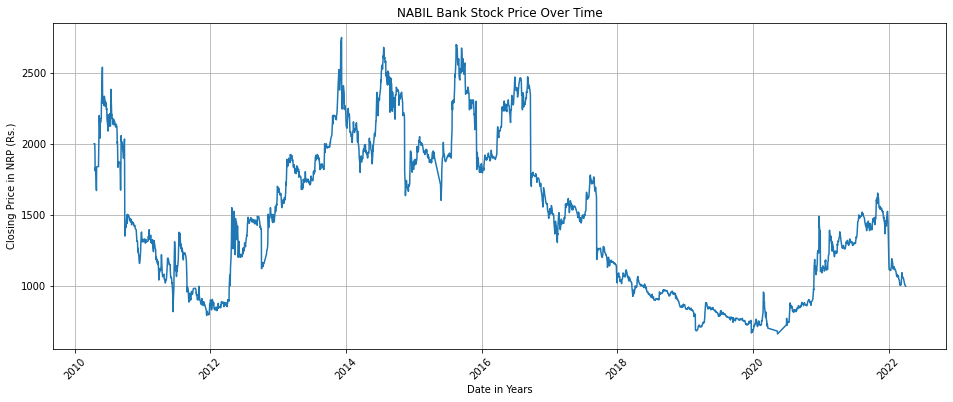

In [14]:
# Plotting Data Graph of Closing Price
plt.figure(figsize=(16, 6))
plt.grid(True)
plt.title(f"{company} Bank Stock Price Over Time")
plt.xlabel("Date in Years")
plt.ylabel("Closing Price in NRP (Rs.)")
plt.plot(dataset["Close"])
plt.tick_params(axis='x', rotation=45)
plt.show()

array([[<AxesSubplot:title={'center':'Transactions'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Difference'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'PreviousClosing'}>,
        <AxesSubplot:title={'center':'PercentDifference'}>],
       [<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Open'}>, <AxesSubplot:>]],
      dtype=object)

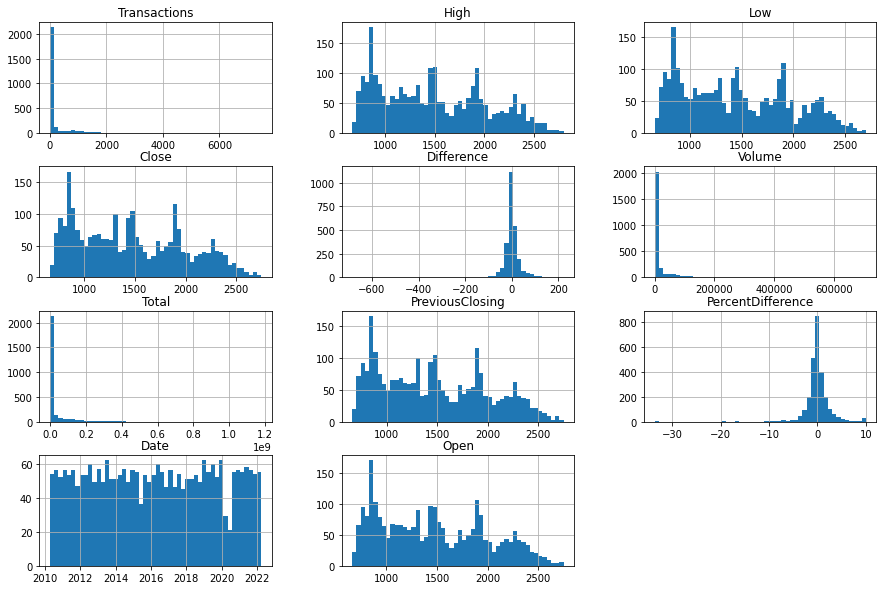

In [15]:
# histogram
dataset.hist(bins=50, figsize=(15, 10))

<AxesSubplot:title={'center':'NABIL bank Stock lagplot with lag =3 '}, xlabel='y(t)', ylabel='y(t + 3)'>

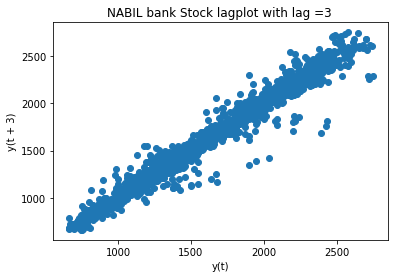

In [16]:
# Auto coorelation using lag plot
plt.title(f"{company} bank Stock lagplot with lag =3 ")
lag_plot(dataset["Open"],lag=3)

#### Step 3: Exploratory Data Analysis (EDA)

In [17]:
dataset.isnull().sum()

Symbol               0
Transactions         0
High                 0
Low                  0
Close                0
Difference           0
Volume               0
Total                0
PreviousClosing      0
PercentDifference    0
Date                 0
Open                 0
dtype: int64

D:\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

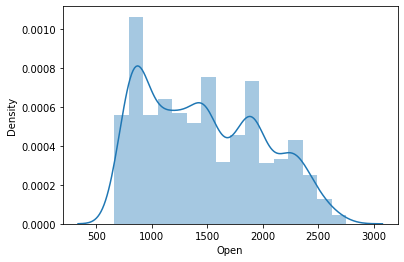

In [18]:
# Distribution Plot of Open
sns.distplot(dataset["Open"])


D:\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

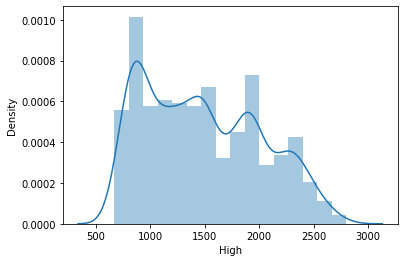

In [19]:
# Distribution Plot of High
sns.distplot(dataset["High"])

D:\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

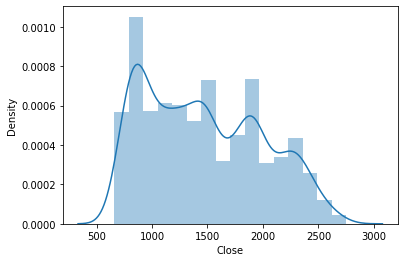

In [20]:
# Distribution Plot of Close
sns.distplot(dataset["Close"])

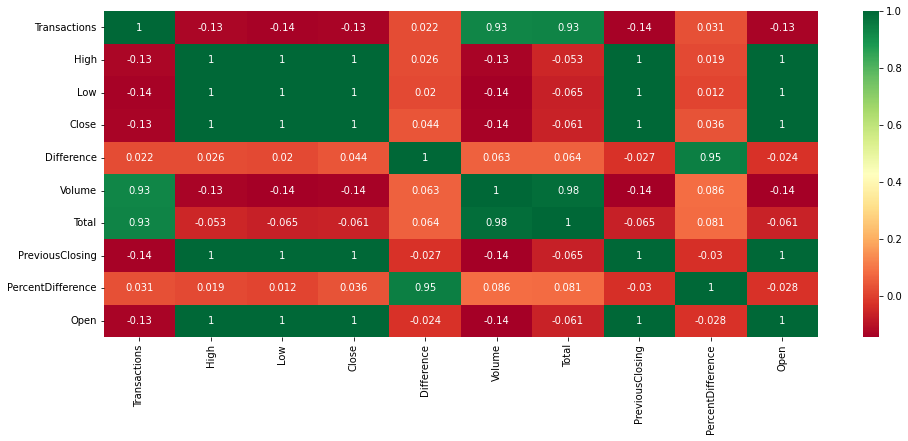

In [21]:
# Data Correleation
plt.figure(figsize=(16, 6))
correleation = dataset.corr()
sns.heatmap(correleation, annot=True, cmap='RdYlGn')
plt.show() 

In [22]:
# Extracting Highly Correlated Features

correleated_targets = abs(correleation["Close"]) # Absolute value of Correleation
relevent_features = correleated_targets[correleated_targets > 0.2] # Selecting Features with Correleation > 0.2
names = [index for index,values in relevent_features.iteritems()] # Getting Names of Features
names.remove("Close") # Removing Close from names
print("Length: ", len(names), "Names: ", names)

Length:  4 Names:  ['High', 'Low', 'PreviousClosing', 'Open']


Transactions            AxesSubplot(0.125,0.125;0.065678x0.755)
High                 AxesSubplot(0.203814,0.125;0.065678x0.755)
Low                  AxesSubplot(0.282627,0.125;0.065678x0.755)
Close                AxesSubplot(0.361441,0.125;0.065678x0.755)
Difference           AxesSubplot(0.440254,0.125;0.065678x0.755)
Volume               AxesSubplot(0.519068,0.125;0.065678x0.755)
Total                AxesSubplot(0.597881,0.125;0.065678x0.755)
PreviousClosing      AxesSubplot(0.676695,0.125;0.065678x0.755)
PercentDifference    AxesSubplot(0.755508,0.125;0.065678x0.755)
Open                 AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

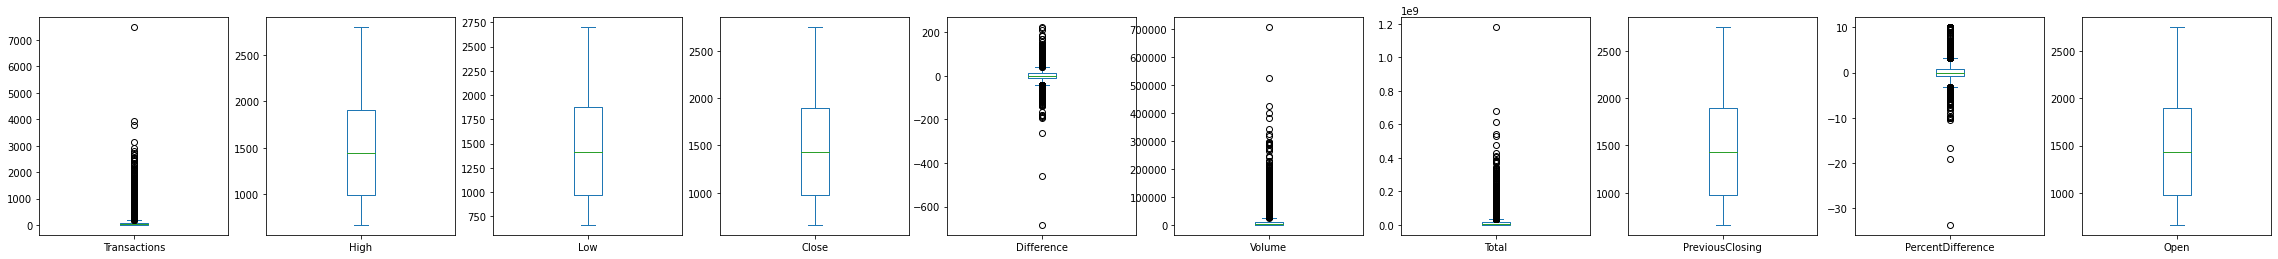

In [23]:
# Box Plot of Relevent Features
dataset.plot(kind="box", subplots=True, figsize=(40, 4))

### Accuracy Matrix Evaluator 🧪

In [24]:
def accuracy_matrix(actual, predicted):
    """
    Args:
        actual: Actual values

        predicted: Predicted values

        model: Model used for prediction

        fold_number: Number of folds

    returns:
        Accuracy Matrix
    """
    # Mean Squared Error (MSE)
    mean_squared_err = mean_squared_error(actual, predicted)

    # Root Mean Squared Error (RMSE)
    root_mean_squared_err = np.sqrt(mean_squared_err)

    # Mean Absolute Error (MAE)
    mean_absolute_err = mean_absolute_error(actual, predicted)

    # R2 Score
    r_two_score = r2_score(actual, predicted)

    print("\t\tAccuracy Matrix\n")
    print("Mean Squared Error           : ", mean_squared_err)
    print("Root Mean Squared Error      : ", root_mean_squared_err)
    print("Mean Absolute Error          : ", mean_absolute_err)
    print("R-Squared Score              : ", r_two_score)

    return {"MSE": mean_squared_err,
            "RMSE": root_mean_squared_err,
            "MAE": mean_absolute_err,
            "R2 Score": r_two_score
            }


### Model Building

#### Splitting Dataset into Training and Testing Set

In [25]:
# Spliting Data into Train and Test

# Extracting Features and Targets
X = dataset.drop(["Close","Date","Symbol"], axis=1)  # Extracting Features
Y = dataset["Close"]  # Extracting Targets

X_Train, X_Test, Y_Train, Y_Test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=75)

In [26]:
# Shape of Train and Test
print("X_Train Shape: ", X_Train.shape,
      "\nY_Train Shape: ", Y_Train.shape, )
print("X_Test Shape: ", X_Test.shape,
      "\nY_Test Shape: ", Y_Test.shape)


X_Train Shape:  (2092, 9) 
Y_Train Shape:  (2092,)
X_Test Shape:  (524, 9) 
Y_Test Shape:  (524,)


#### Linear Regression

In [27]:
# Initializing Linear Regression Model
linear_regression = LinearRegression()

# Fitting Linear Regression Model
linear_regression = linear_regression.fit(X_Train, Y_Train)


In [28]:
# Predicting Test Data
prediction_lr = linear_regression.predict(X_Test)

print("Actual Closing Price                             : ", Y_Test[0])
print("Predicted Closing Price Using Linear Regression  : ",prediction_lr[0])

Actual Closing Price                             :  830.0
Predicted Closing Price Using Linear Regression  :  830.009989425641


In [29]:
# K-Fold Cross Validation
kFold = model_selection.KFold(n_splits=30, shuffle=True)
results_kfold = model_selection.cross_val_score(
    linear_regression, X, Y, cv=kFold)
results_kfold.mean()

0.9999998953581

##### Accuracy Matrix

In [30]:
lr_accuracy = accuracy_matrix(Y_Test, prediction_lr)
print("Score of Linear Regression Model: ", linear_regression.score(X, Y))

		Accuracy Matrix

Mean Squared Error           :  0.06847146405283686
Root Mean Squared Error      :  0.26167052576252614
Mean Absolute Error          :  0.016503566435162802
R-Squared Score              :  0.9999997536607981
Score of Linear Regression Model:  0.9999998981123709


##### Plotting Output 📊

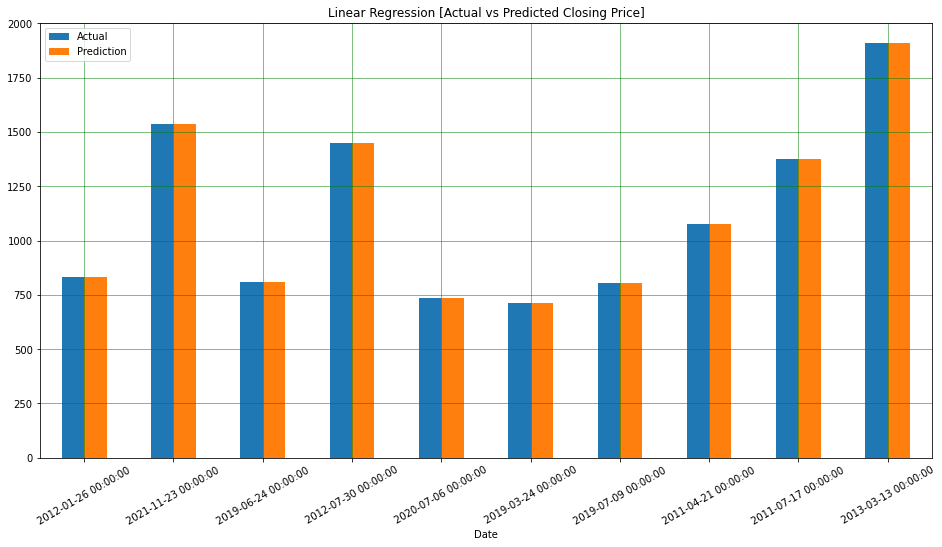

In [31]:
#### Data Visualization bar graph

lr_data = pd.DataFrame({"Actual": Y_Test, "Prediction": prediction_lr})
lr_data.head(10).plot(kind='bar', figsize=(16, 8))
plt.title("Linear Regression [Actual vs Predicted Closing Price]")
plt.tick_params(axis='x', rotation=30)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

#### Random Forest Regression

In [32]:
# Initializing Random Forest Regressor Model

random_fores_regression = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting Random Forest Regression Model
random_fores_regression = random_fores_regression.fit(X_Train, Y_Train)


In [33]:
# Predicting Test Data

prediction_rf = random_fores_regression.predict(X_Test)

print("Actual Closing Price                                     : ", Y_Test[0])
print("Predicted Closing Price Using Random Forest Regression   : ", prediction_rf[0])


Actual Closing Price                                     :  830.0
Predicted Closing Price Using Random Forest Regression   :  829.74


##### Accuracy Matrix

In [34]:
rf_accuracy = accuracy_matrix(Y_Test, prediction_rf)

		Accuracy Matrix

Mean Squared Error           :  183.0768600801525
Root Mean Squared Error      :  13.530589790550614
Mean Absolute Error          :  8.643465648854962
R-Squared Score              :  0.9993413459427759


##### Plotting Output 📊

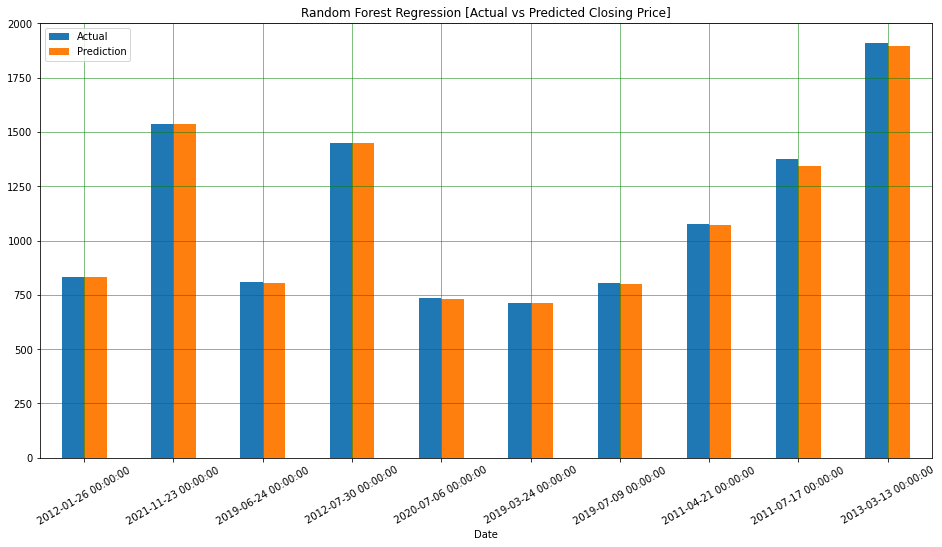

In [35]:
# Data Visualization

rf_data = pd.DataFrame({"Actual": Y_Test, "Prediction": prediction_rf})
rf_data.head(10).plot(kind='bar', figsize=(16, 8))
plt.tick_params(axis='x', rotation=30)
plt.title("Random Forest Regression [Actual vs Predicted Closing Price]")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()


### Model Evaluation

In [36]:
evaluation_data = pd.DataFrame({
    "Linear Regression": lr_accuracy,
    "Random Forest Regression": rf_accuracy
})
evaluation_data

,Linear Regression,Random Forest Regression
MSE,0.068471,183.076860
RMSE,0.261671,13.530590
MAE,0.016504,8.643466
R2 Score,1.000000,0.999341
